<a href="https://colab.research.google.com/github/Sachin-crypto/Learning_Rate_Impact/blob/main/Impact_of_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using Momentum to Accelerate the Training Process**

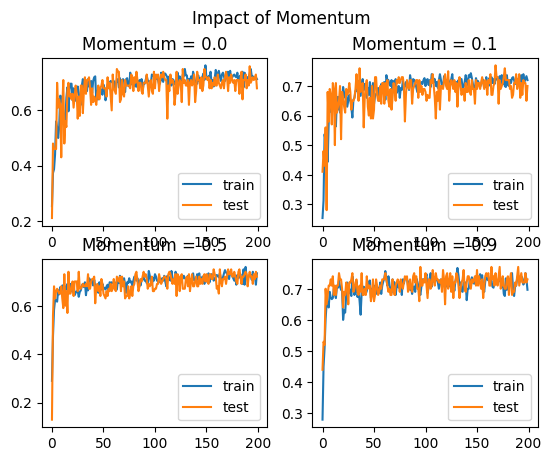

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Reading data
df = pd.read_csv("/content/drive/MyDrive/Datasets/bmi_data.csv")
X = df[['Height', 'Weight', 'Gender']]
y = df['Index']

# One-hot Encoding the Target Variable
y = to_categorical(y)

# Preparing Data for Training
param = 300
X_train, X_test = X[:param], X[param:]
y_train, y_test = y[:param], y[param:]

# Empty list for storing the training data accuracy
acc = []
# Empty list for storing the validation data accuracy
val_acc = []

# List of Momentum
mom = [0.0, 0.1, 0.5, 0.9]

for i in range(len(mom)):
    model = Sequential()

    model.add(Dense(128, input_shape=(3,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    optimize = SGD(learning_rate=0.001, momentum=mom[i])

    model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])

    result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

    acc.append(result.history['accuracy'])
    val_acc.append(result.history['val_accuracy'])

# Plot learning curves for each momentum value
for i in range(len(mom)):
    plt.subplot(2, 2, (i + 1))
    plt.plot(acc[i], label='train')
    plt.plot(val_acc[i], label='test')
    plt.legend()
    plt.title('Momentum = ' + str(mom[i]))
    plt.suptitle("Impact of Momentum")

plt.show()